# Minimum Weight Spanning Trees

In this notebook, we will learn how to use the built-in function <code>min_spanning_tree</code> to run Kruskal's algorithm and Prim's algorithm.  Then we will write our own implementation of these algorithms.

## Weighted Graphs

First, we learn how to construct and work with (edge)-weighted graphs in Sage.  First we define a graph and print its list of edges.

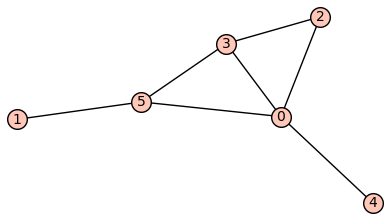

[(0, 2, None), (0, 3, None), (0, 4, None), (0, 5, None), (1, 5, None), (2, 3, None), (3, 5, None)]

In [167]:
n=6
p=0.6
G = graphs.RandomGNP(n,p)
while not G.is_connected():
    G = graphs.RandomGNP(n,p)
G.show(save_pos=True)
G.edges()

Note that each edge is a 3-tuple.  The first two entries are its endpoints, and the third entry is set to <code>None</code> by default.  We can use this third entry to store the weight of the edge.

We can access the three entries of an edge <code>e</code> with <code>e[0]</code>, <code>e[1]</code>, and <code>e[2]</code>.

Let's add a weight to each edge in $G$.  We will let the weight of each edge <code>e</code> be the sum of the labels of its endpoints.

In [168]:
for e in G.edges():
    G.add_edge(e[0],e[1],e[0]+e[1])
G.edges()

[(0, 2, 2), (0, 3, 3), (0, 4, 4), (0, 5, 5), (1, 5, 6), (2, 3, 5), (3, 5, 8)]

Now we can print a drawing of the weighted graph $G$.

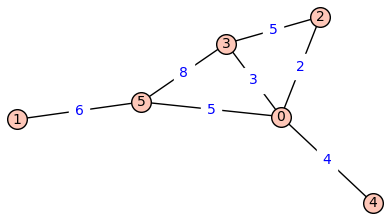

In [169]:
plt = G.graphplot(edge_labels=True)  # Creates a plot object in which the edge weights will be shown
plt.show()  # Displays the plot

## The Built-in Function <code>min_spanning_tree</code>

Now that our graph $G$ is weighted, we can run the built-in function <code>min_spanning_tree</code> to find a minimum spanning tree of $G$.

In [170]:
G.min_spanning_tree()

[(1, 5, 6), (2, 0, 2), (3, 0, 3), (4, 0, 4), (5, 0, 5)]

Note that <code>G.min_spanning_tree()</code> returns the list of edges of a minimum spanning tree of $G$.  We write a function below that returns a drawing of $G$ in which the edges of the minimum spanning tree are coloured red.

In [171]:
def red_edges(G,edges):
    edge_colors={}
    edge_colors['red']=edges
    plt=G.graphplot(edge_colors=edge_colors,edge_labels=True)
    plt.show()

Now we can see the minimum spanning tree!

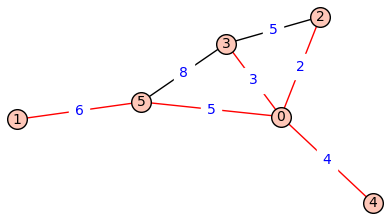

In [172]:
edges=G.min_spanning_tree()
red_edges(G,edges)

One can pass several options to <code>min_spanning_tree</code> in order to run a specific algorithm (e.g., Kruskal's algorithm, Prim's algorithm starting at a specified vertex) to compute the minimum weight spanning tree.
- The <code>algorithm</code> option can be set to 'Kruskal' to run Kruskal's algorithm, or 'Prim_Boost' to run Prim's algorithm.
- The <code>starting_vertex</code> option is used to set the starting vertex for Prim's algorithm.

See the <a href="https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/generic_graph.html#sage.graphs.generic_graph.GenericGraph.min_spanning_tree">Sage Documentation</a> for the complete list of options.

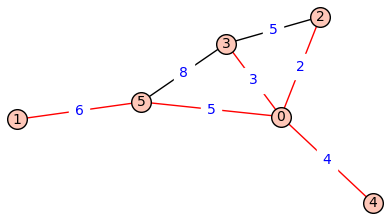

In [173]:
edges=G.min_spanning_tree(algorithm='Kruskal')
red_edges(G,edges)

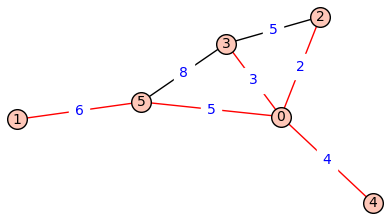

In [174]:
edges=G.min_spanning_tree(algorithm='Prim_Boost',starting_vertex=0)
red_edges(G,edges)

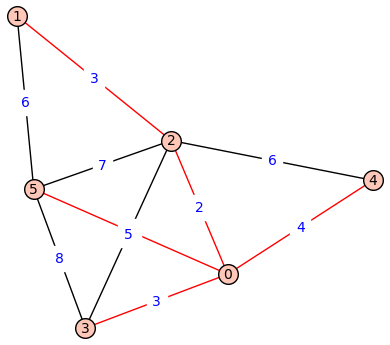

In [165]:
edges=G.min_spanning_tree(algorithm='Prim_Boost',starting_vertex=1)
red_edges(G,edges)